# Model `FastStep`

In [1]:
# use project files rather than the installed PyBMF

%load_ext autoreload
%autoreload 2

import sys
sys.path.insert(0, '../')

In [2]:
# # generating synthetic data

# from PyBMF.generators import BlockDiagonalMatrixGenerator

# data = BlockDiagonalMatrixGenerator(m=300, n=500, k=5, overlap=[0.3, 0.2])
# data.generate(seed=1000)
# data.add_noise(noise=[0.4, 0.1], seed=2000)

# data.show_matrix(scaling=0.5)

c:\Users\nieht\Anaconda3\envs\pybmf\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[I] Found settings.ini at d:\MEGA\PyBMF\examples\settings.ini
[I] Sampling axis 0 to size 300
[I]   sampling seed: 1000
[I]   sampling from: (943, 1682)
[I]   sampling to  : (300, 1682)
[I] Sampling axis 1 to size 500
[I]   sampling seed: 1000
[I]   sampling from: (300, 1682)
[I]   sampling to  : (300, 500)


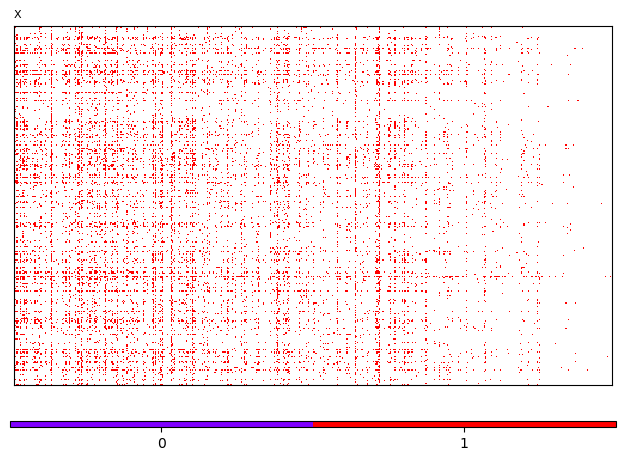

<Figure size 640x480 with 0 Axes>

In [3]:
# loading real-world data

from PyBMF.datasets import MovieLensData

data = MovieLensData(size="100k")
data.load()

idx = data.sample(factor_id=0, n_samples=300, seed=1000)
idx = data.sample(factor_id=1, n_samples=500, seed=1000)

data.show_matrix(scaling=0.5)

In [4]:
# splitting the data into train, validation and test

from PyBMF.datasets import RatioSplit, NoSplit

# split = RatioSplit(X=data.X, val_size=0.1, test_size=0.2, seed=1997)
split = NoSplit(X=data.X)

# split.negative_sample(
#     train_size=split.pos_train_size, 
#     val_size=split.pos_val_size, 
#     test_size=split.pos_test_size, 
#     seed=2023, type='popularity')
split.negative_sample(
    size=split.pos_size, 
    seed=2023, type='popularity')

X_train, X_val, X_test = split.X_train, split.X_val, split.X_test

[I] NoSplit, sampling positives
[I] RatioSplit, sampling positives
[I]   seed         : 1722927039
[I]   train_size   : 10754
[I]   val_size     : 0
[I]   test_size    : 0
[I]   seed         : 1722927039
[I] RatioSplit, sampling negatives
[I]   seed         : 2023
[I]   all_negatives: 139246
[I]   n_negatives  : 10754
[I]   train_size   : 10754
[I]   val_size     : 0
[I]   test_size    : 0
[I]   seed         : 2023


In [5]:
# shared parameters

k = 20
W = 'full'
task = 'reconstruction'

[I] k            : 20
[I] U            : None
[I] V            : None
[I] W            : full
[I] tau          : 20
[I] solver       : line-search
[I] tol          : 0
[I] min_diff     : 0.001
[I] max_round    : 8
[I] max_iter     : 5
[I] init_method  : uniform
[I] normalize_method : None
[I] seed         : 1722927039
[I] verbose      : False
[I] display      : False
[I] task         : reconstruction
[I] show_logs    : False
[I] save_model   : False
[I] Missing validation data.
[W] Missing testing data.
[I] name         : 2024-08-06 14-50-39-415125 FastStep
[I] U, V existed. Skipping initialization.


[W] Stopped in advance: Reach maximum round
[I] time elapsed :  2m18s


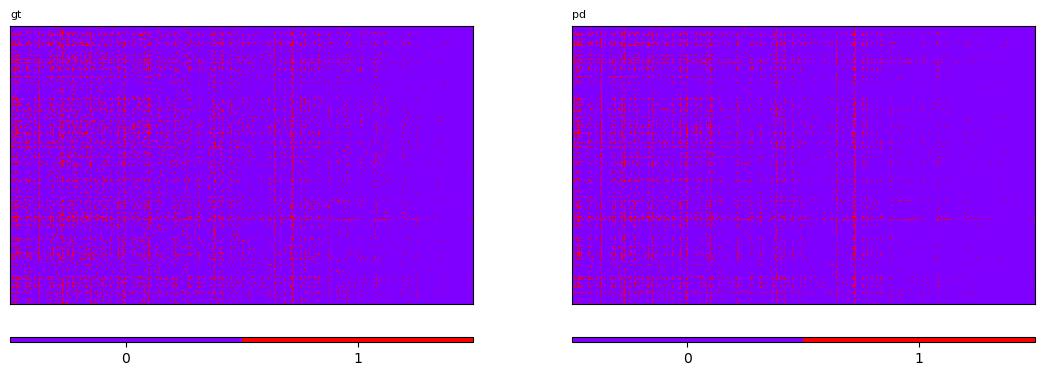

<Figure size 640x480 with 0 Axes>

In [6]:
from PyBMF.models import FastStep

tol = 0
tau = 20
min_diff = 0.001
max_iter = 5
max_round = 8
init_method = 'uniform'

model = FastStep(k=k, U=None, V=None, W=W, tau=tau, solver='line-search', tol=tol, min_diff=min_diff, max_round=max_round, max_iter=max_iter, init_method=init_method, normalize_method=None, seed=None)
model.fit(X_train=X_train, task=task, verbose=False, display=False, show_logs=False, save_model=False)

# Result on ordinary multiplication

It's worth noting that the objective function is **NOT** minimizing the error of Boolean product. 
It's the thresholded ordinary product.

X ~ (U @ V) - τ

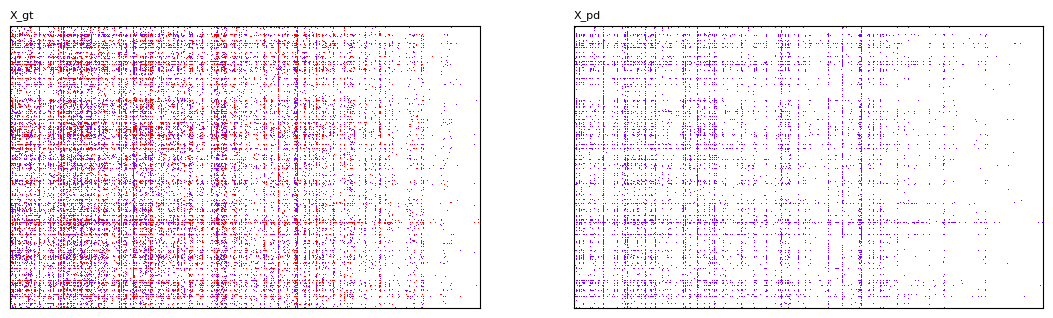

<Figure size 640x480 with 0 Axes>

In [7]:
from PyBMF.utils import get_prediction, binarize, show_matrix, show_factor_distribution, matmul

X_pd = get_prediction(U=model.U, V=model.V, boolean=False)
X_pd = binarize(X_pd, model.tau)

show_matrix([(X_train, [0, 0], 'X_gt'), (X_pd, [0, 1], 'X_pd')], scaling=0.5)

# Result on Boolean multiplication

The original paper did not advise us how to choose the threshold after the real-valued factor matrices are found.

X ~ matmul( (U - u), (V - v) )

0 - [0.840, 5.151], [0.000, 5.434]
1 - [0.000, 3.295], [0.000, 3.220]
2 - [0.000, 3.141], [0.000, 3.008]
3 - [0.000, 3.157], [0.000, 3.797]
4 - [0.000, 3.623], [0.000, 3.346]
5 - [0.000, 3.427], [0.000, 3.392]
6 - [0.000, 4.375], [0.000, 3.068]
7 - [0.000, 2.742], [0.000, 3.687]
8 - [0.000, 2.898], [0.000, 3.656]
9 - [0.000, 4.232], [0.000, 3.680]
10 - [0.000, 2.612], [0.000, 2.840]
11 - [0.000, 11.361], [0.000, 4.002]
12 - [0.000, 2.479], [0.000, 2.403]
13 - [0.000, 9.536], [0.000, 5.510]
14 - [0.000, 3.351], [0.000, 4.679]
15 - [0.000, 1.811], [0.000, 2.807]
16 - [0.000, 9.417], [0.000, 6.980]
17 - [0.000, 3.742], [0.000, 10.371]
18 - [0.000, 5.127], [0.000, 4.938]
19 - [0.000, 4.344], [0.000, 10.259]


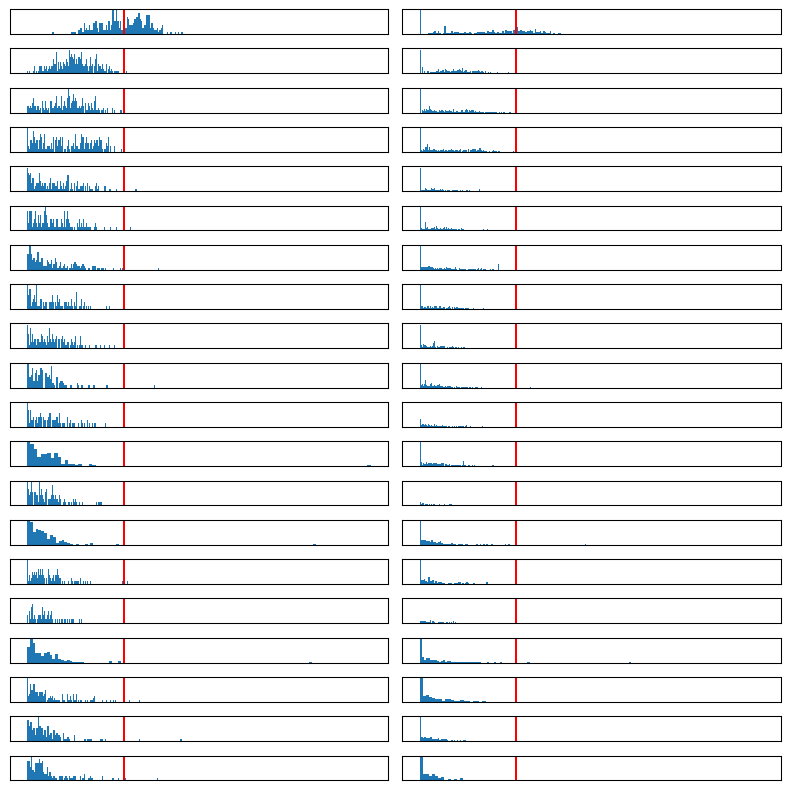

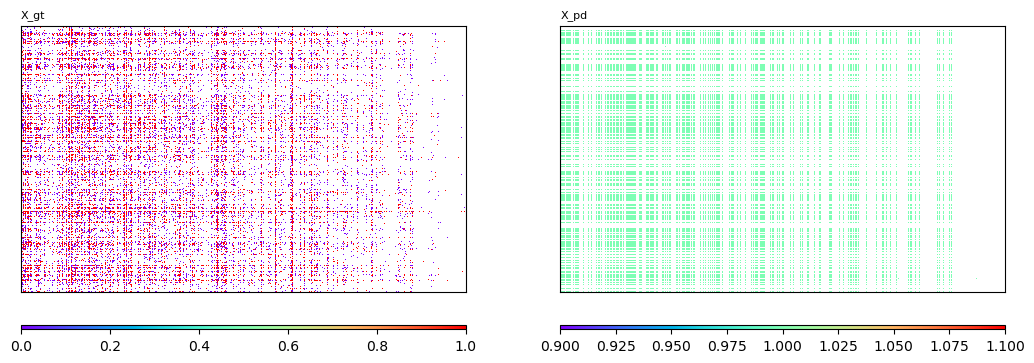

<Figure size 640x480 with 0 Axes>

In [8]:
from PyBMF.utils import show_factor_distribution, show_matrix, binarize, matmul

U = model.U.copy()
V = model.V.copy()

k = model.k

# initial guess
u, v = 3.2, 3.2

show_factor_distribution(U=U, V=V, us=[u] * k, vs=[v] * k, resolution=100, show_hist=True, show_minmax=True, remove_below=1e-5)

U_bool = binarize(U, u)
V_bool = binarize(V, v)

X_bool = matmul(U_bool, V_bool.T, sparse=True, boolean=True)

show_matrix([(X_train, [0, 0], 'X_gt'), (X_bool, [0, 1], 'X_pd')], scaling=0.5, colorbar=True)

# `SimpleThreshold` + `BinaryMFThreshold`

From the above, we can see that `FastStep` generates poorly binarized factors. We use `SimpleThreshold` and `BinaryMFThreshold` to find binarization thresholds for them.

We noticed that the factors are not only poorly binarized, but also differently distributed. Thus, `SimpleThreshold` (`columnwise` = `True`) + `BinaryMFThresholdExColumnwise` would be better as they gives columnwise thresholds.

[I] U            : (300, 20)
[I] V            : (500, 20)
[I] W            : full
[I] by_metric    : F1
[I] columnwise   : False
[I] randomize    : False
[I] n_grid       : 40
[I] n_trials     : 100
[I] normalize_method : None
[I] solver       : grid-search
[I] init_method  : custom
[I] seed         : 2024
[I] verbose      : False
[I] display      : False
[I] task         : reconstruction
[I] show_logs    : False
[I] save_model   : False
[I] show_result  : True
[I] Missing validation data.
[W] Missing testing data.
[I] name         : 2024-08-06 16-45-41-832270 SimpleThreshold
[I] Search for u, v using grid search with 1600 trials in total.


[I] The optimal parameters over 'Accuracy':


train                      \
                                                        0                       
                  time iter         u         v    Recall Precision  Accuracy   
535  06/08/24 04:45:52  536  3.787159  3.988681  0.225776  0.638611  0.935333   

               
               
           F1  
535  0.333608

[I] The optimal parameters over 'F1':


train                      \
                                                       0                       
                  time iter        u         v    Recall Precision  Accuracy   
493  06/08/24 04:45:51  494  3.49584  3.456858  0.523154  0.378218  0.904153   

               
               
           F1  
493  0.439034

[I] Trial: 1599 / 1600: 100%|██████████| 1600/1600 [00:30<00:00, 53.16it/s]


[I] The optimal parameters are set according to metric 'F1'.
[I] time elapsed :  30s


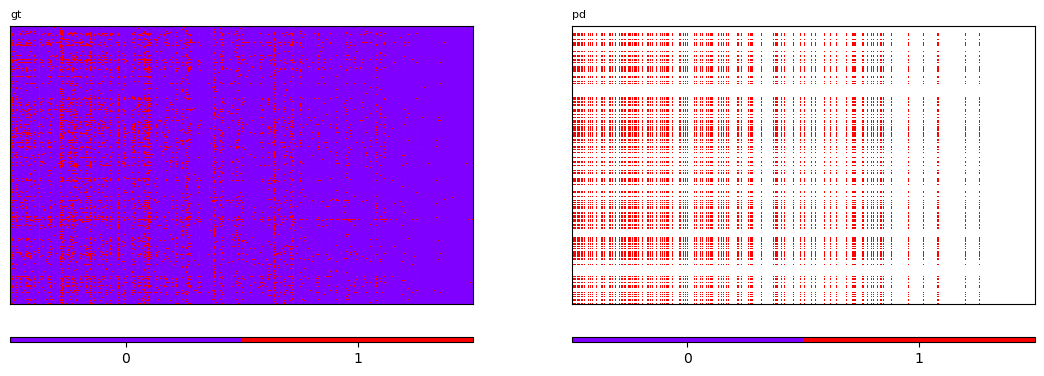

0 - [0.840, 5.151], [0.000, 5.434]
1 - [0.000, 3.295], [0.000, 3.220]
2 - [0.000, 3.141], [0.000, 3.008]
3 - [0.000, 3.157], [0.000, 3.797]
4 - [0.000, 3.623], [0.000, 3.346]
5 - [0.000, 3.427], [0.000, 3.392]
6 - [0.000, 4.375], [0.000, 3.068]
7 - [0.000, 2.742], [0.000, 3.687]
8 - [0.000, 2.898], [0.000, 3.656]
9 - [0.000, 4.232], [0.000, 3.680]
10 - [0.000, 2.612], [0.000, 2.840]
11 - [0.000, 11.361], [0.000, 4.002]
12 - [0.000, 2.479], [0.000, 2.403]
13 - [0.000, 9.536], [0.000, 5.510]
14 - [0.000, 3.351], [0.000, 4.679]
15 - [0.000, 1.811], [0.000, 2.807]
16 - [0.000, 9.417], [0.000, 6.980]
17 - [0.000, 3.742], [0.000, 10.371]
18 - [0.000, 5.127], [0.000, 4.938]
19 - [0.000, 4.344], [0.000, 10.259]


<Figure size 640x480 with 0 Axes>

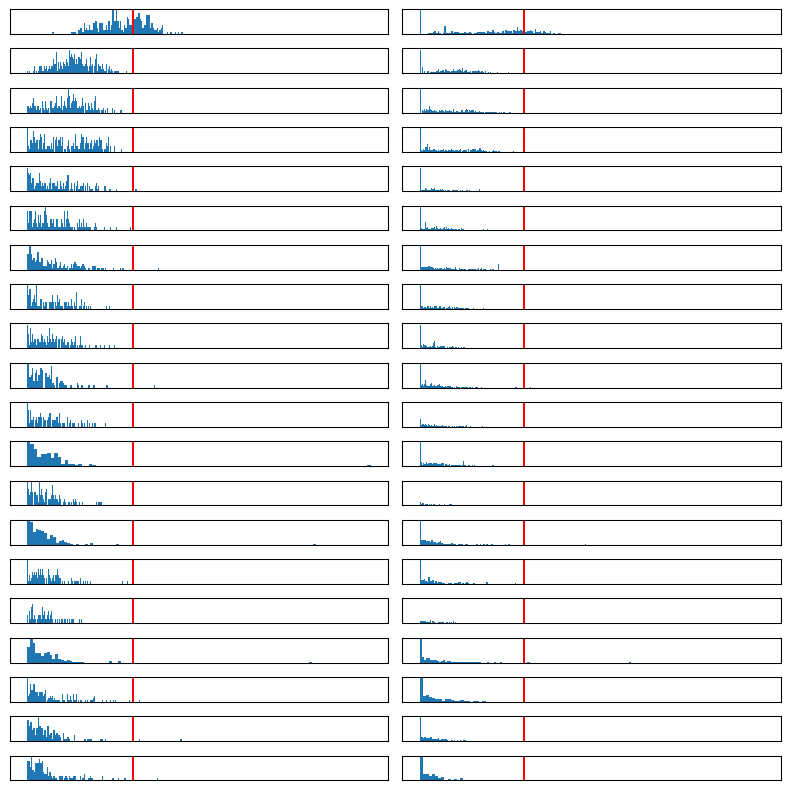

In [11]:
from PyBMF.models.SimpleThreshold import SimpleThreshold

U, V = model.U.copy(), model.V.copy()

model_st = SimpleThreshold(U=U, V=V, by_metric='F1', columnwise=False, randomize=False, n_grid=40, seed=2024)
model_st.fit(X_train=X_train, X_val=None, X_test=None, task='reconstruction', verbose=False, display=False, show_logs=False, show_result=True, save_model=False)

show_factor_distribution(U=model_st.U, V=model_st.V, resolution=100, show_hist=True, show_minmax=True, remove_below=1e-5, us=[model_st.u] * k, vs=[model_st.v] * k)

[I] k            : 20
[I] U            : (300, 20)
[I] V            : (500, 20)
[I] W            : full
[I] u            : 4.055613528472683
[I] v            : 4.210743242457633
[I] lamda        : 10
[I] solver       : line-search
[I] min_diff     : 0.001
[I] max_iter     : 5
[I] init_method  : custom
[I] normalize_method : None
[I] seed         : 1722850891
[I] verbose      : False
[I] display      : False
[I] task         : reconstruction
[I] show_logs    : False
[I] save_model   : False
[I] show_result  : True
[I] Missing validation data.
[W] Missing testing data.
[I] name         : 2024-08-05 17-41-31-663718 BinaryMFThreshold


[I] F: 4218.969080: : 6it [00:01,  5.29it/s]                     


[W] Stopped in advance: Reach maximum iteration
[I] time elapsed :  1s


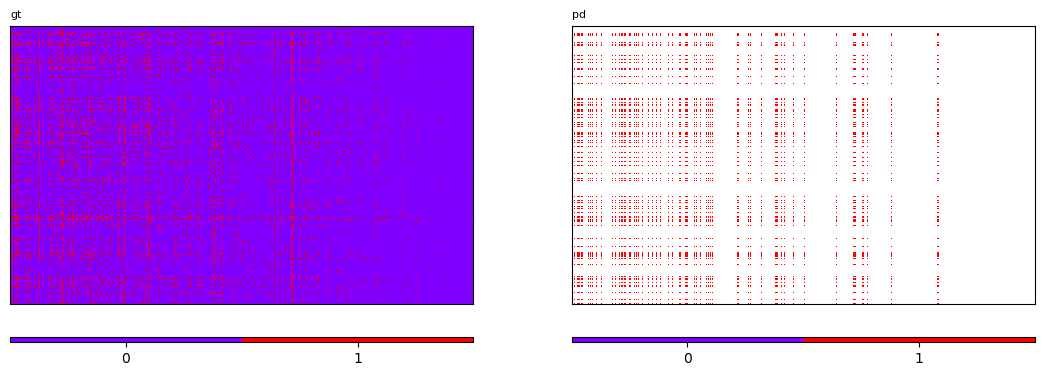

0 - [0.917, 5.239], [0.000, 6.082]
1 - [0.000, 3.367], [0.000, 4.160]
2 - [0.000, 3.835], [0.000, 3.267]
3 - [0.000, 3.221], [0.000, 3.813]
4 - [0.000, 2.650], [0.000, 2.984]
5 - [0.000, 3.658], [0.000, 2.800]
6 - [0.000, 3.428], [0.000, 4.124]
7 - [0.000, 7.542], [0.000, 3.296]
8 - [0.000, 4.538], [0.000, 3.402]
9 - [0.000, 2.934], [0.000, 3.905]
10 - [0.000, 2.469], [0.000, 3.173]
11 - [0.000, 3.925], [0.000, 3.958]
12 - [0.000, 3.824], [0.000, 3.036]
13 - [0.000, 2.723], [0.000, 2.635]
14 - [0.000, 3.642], [0.000, 3.458]
15 - [0.000, 4.549], [0.000, 5.338]
16 - [0.000, 4.162], [0.000, 3.220]
17 - [0.000, 8.325], [0.000, 3.022]
18 - [0.000, 3.008], [0.000, 4.909]
19 - [0.000, 3.068], [0.000, 4.114]


<Figure size 640x480 with 0 Axes>

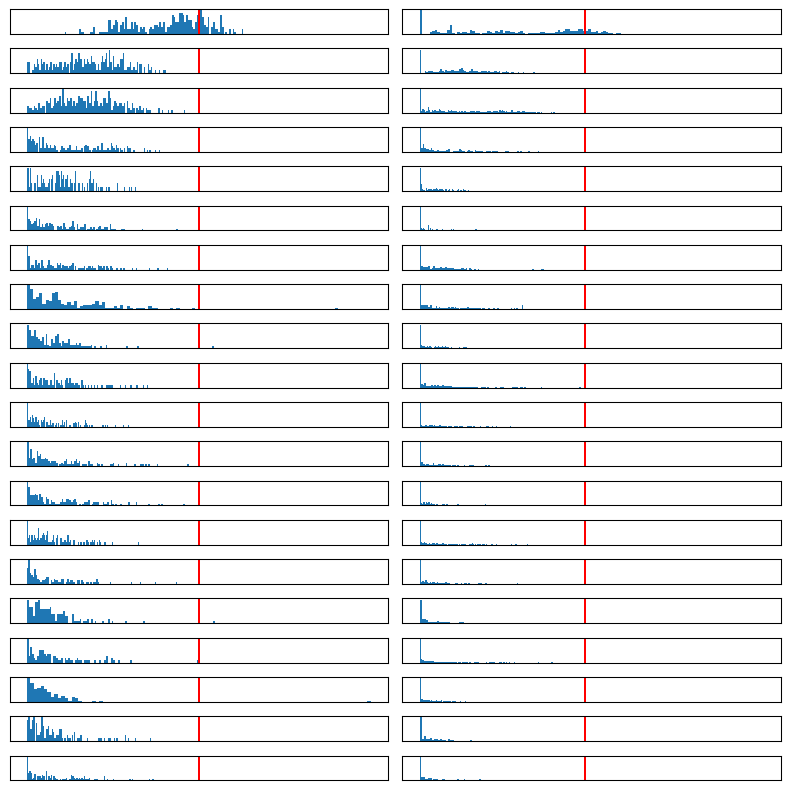

train  \
                                                                   0   
                time iter         u         v            F    Recall   
0  05/08/24 05:41:31    0  4.055614  4.210743  4277.681873  0.236842   
1  05/08/24 05:41:31    1  3.992966  4.055640  4247.567424  0.297006   
2  05/08/24 05:41:32    2  4.030848  4.101358  4233.598834  0.276362   
3  05/08/24 05:41:32    3  4.195350  3.964256  4222.268102  0.266505   
4  05/08/24 05:41:32    4  4.164532  3.981499  4219.711840  0.279431   
5  05/08/24 05:41:32    5  4.170833  3.994309  4219.043527  0.276641   
6  05/08/24 05:41:32    6  4.157917  3.994620  4218.969080  0.279338   

                                 
                                 
  Precision  Accuracy        F1  
0  0.637547  0.935633  0.345379  
1  0.558392  0.932760  0.387763  
2  0.585731  0.934107  0.375537  
3  0.581575  0.933667  0.365515  
4  0.572381  0.933373  0.375531  
5  0.574324  0.933440  0.373415  
6  0.571755  0.933333  0.375312

In [ ]:
from PyBMF.models import BinaryMFThreshold

U, V = model_st.U.copy(), model_st.V.copy()

u, v = model_st.u, model_st.v

task = 'reconstruction'
init_method = 'custom'
lamda = 10
solver = 'line-search'

model_bmft = BinaryMFThreshold(k=k, U=U, V=V, W=W, u=u, v=v, lamda=lamda, init_method=init_method, max_iter=max_iter, solver=solver, normalize_method=None)
model_bmft.fit(X_train=X_train, X_val=None, X_test=None, task=task, verbose=False, display=False, show_logs=False, show_result=True, save_model=False)

show_factor_distribution(U=model_bmft.U, V=model_bmft.V, resolution=100, show_hist=True, show_minmax=True, remove_below=1e-5, us=[model_bmft.u] * model_bmft.k, vs=[model_bmft.v] * model_bmft.k)

display(model_bmft.logs['updates'])

# `SimpleThreshold` + `BinaryMFThresholdExColumnwise`

We use `SimpleThreshold` (`columnwise` = `True`) + `BinaryMFThresholdExColumnwise` to find columnwise thresholds for them.

[I] U            : (300, 20)
[I] V            : (500, 20)
[I] W            : full
[I] by_metric    : F1
[I] columnwise   : True
[I] randomize    : True
[I] n_grid       : 10
[I] n_trials     : 1000
[I] normalize_method : None
[I] solver       : grid-search
[I] init_method  : custom
[I] seed         : 2024
[I] verbose      : False
[I] display      : False
[I] task         : reconstruction
[I] show_logs    : False
[I] save_model   : False
[I] show_result  : True
[I] Missing validation data.
[W] Missing testing data.
[I] name         : 2024-08-05 18-02-03-306938 SimpleThreshold
[I] Search for us, vs using randomized grid search with 1000 trials in total.


[I] Trial: 1000 / 1000: 100%|██████████| 1000/1000 [00:23<00:00, 46.70it/s]d:\MEGA\PyBMF\examples\..\PyBMF\models\SimpleThreshold.py:163: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  
d:\MEGA\PyBMF\examples\..\PyBMF\models\SimpleThreshold.py:164: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  self.X_pd = get_prediction_with_threshold(U=self.U, V=self.V, us=self.us, vs=self.vs)


\
                              
                  time iter   
966  05/08/24 06:02:25  967   

                                                        \
                                                         
                                                    us   
966  (3.828960540132597, 2.3611914015705118, 1.7434...   

                                                          train            \
                                                              0             
                                                    vs   Recall Precision   
966  (4.160516238303446, 2.4611171572633217, 3.2838...  0.35875    0.3765   

                         
                         
     Accuracy        F1  
966  0.911433  0.367411

[I] Trial: 1000 / 1000: 100%|██████████| 1000/1000 [00:23<00:00, 42.75it/s]


[I] time elapsed :  23s


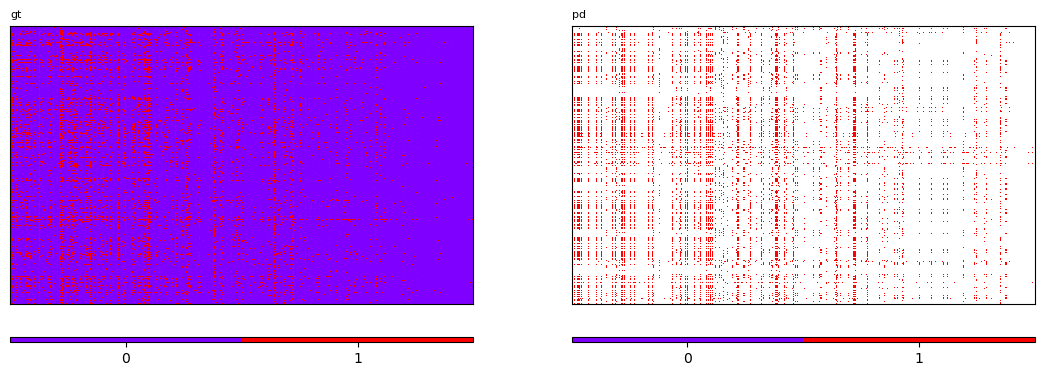

0 - [0.923, 5.187], [0.000, 6.073]
1 - [0.000, 3.516], [0.000, 3.950]
2 - [0.000, 3.557], [0.000, 3.302]
3 - [0.000, 3.398], [0.000, 4.037]
4 - [0.000, 3.010], [0.000, 3.499]
5 - [0.000, 2.995], [0.000, 4.154]
6 - [0.000, 7.924], [0.000, 3.085]
7 - [0.000, 2.729], [0.000, 3.200]
8 - [0.000, 3.096], [0.000, 4.222]
9 - [0.000, 3.138], [0.000, 2.376]
10 - [0.000, 3.492], [0.000, 3.499]
11 - [0.000, 2.294], [0.000, 4.077]
12 - [0.000, 4.166], [0.000, 3.189]
13 - [0.000, 4.396], [0.000, 3.926]
14 - [0.000, 2.944], [0.000, 3.591]
15 - [0.000, 3.095], [0.000, 4.001]
16 - [0.000, 3.074], [0.000, 2.637]
17 - [0.000, 3.656], [0.000, 5.272]
18 - [0.000, 2.376], [0.000, 2.958]
19 - [0.000, 5.244], [0.000, 3.615]


<Figure size 640x480 with 0 Axes>

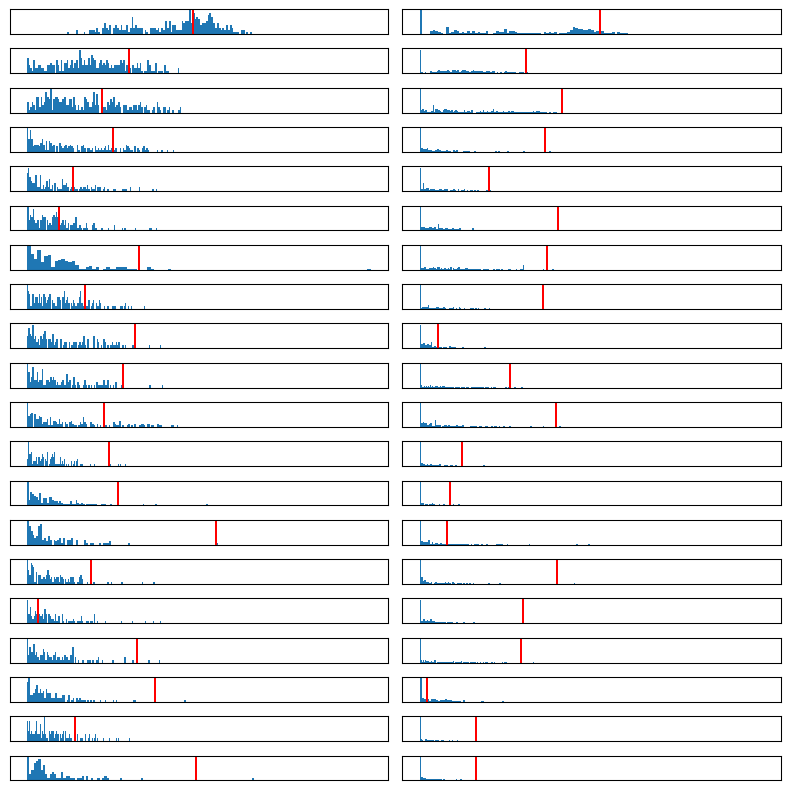

In [ ]:
from PyBMF.models.SimpleThreshold import SimpleThreshold

U, V = model.U.copy(), model.V.copy()

model_st = SimpleThreshold(U=U, V=V, by_metric='F1', columnwise=True, randomize=True, n_trials=1000, seed=2024)
model_st.fit(X_train=X_train, X_val=None, X_test=None, task='reconstruction', verbose=False, display=False, show_logs=False, show_result=True, save_model=False)

show_factor_distribution(U=model_st.U, V=model_st.V, resolution=100, show_hist=True, show_minmax=True, remove_below=1e-5, us=model_st.us, vs=model_st.vs)

[I] k            : 20
[I] U            : (300, 20)
[I] V            : (500, 20)
[I] W            : full
[I] us           : (20,)
[I] vs           : (20,)
[I] lamda        : 5
[I] min_diff     : 0.001
[I] max_iter     : 100
[I] init_method  : custom
[I] solver       : line-search
[I] normalize_method : None
[I] seed         : 1722852158
[I] verbose      : False
[I] display      : False
[I] task         : reconstruction
[I] verbose      : True
[I] show_logs    : False
[I] save_model   : False
[I] show_result  : True
[I] Missing validation data.
[W] Missing testing data.
[I] name         : 2024-08-05 18-02-38-908675 BinaryMFThresholdExColumnwise
[I]   Wolfe line search iter         : 1
[I]     num of function evals        : 14
[I]     num of gradient evals        : 3
[I]     function value update        : 4802.126 -> 4687.944
[I]     threshold update             :
[I]       [3.83, 2.36, 1.74, 1.98, 1.06, 0.73, 2.58, 1.34, 2.49, 2.23, 1.78, 1.89, 2.11, 4.37, 1.48, 0.27, 2.53, 2.96, 1.12, 3

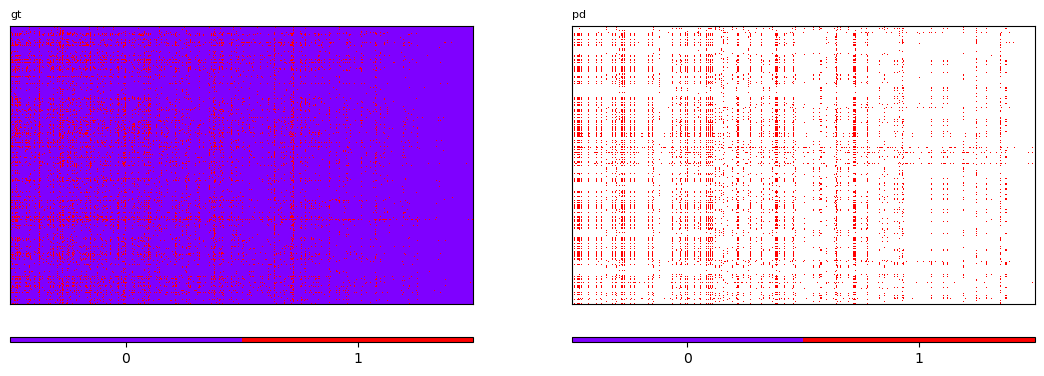

<Figure size 640x480 with 0 Axes>

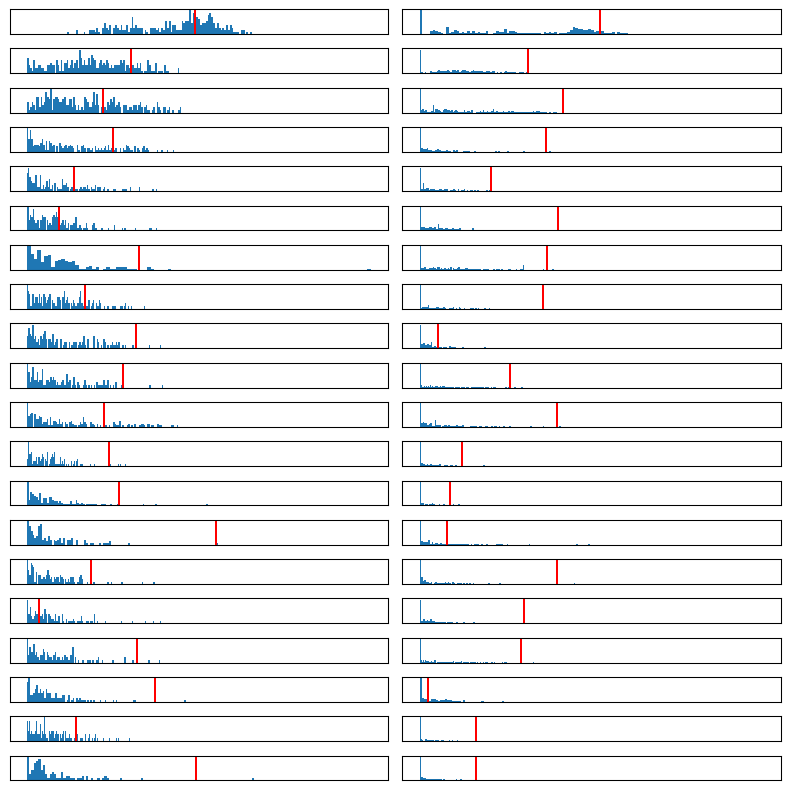

train                              
                                               0                              
                time iter            F    Recall Precision  Accuracy        F1
0  05/08/24 06:02:38    0  4802.126021  0.358750  0.376500  0.911433  0.367411
1  05/08/24 06:02:39    1  4687.944059  0.339967  0.392022  0.914880  0.364143
2  05/08/24 06:02:39    2  4687.944059  0.339967  0.392022  0.914880  0.364143

In [ ]:
from PyBMF.models.BinaryMFThresholdExColumnwise import BinaryMFThresholdExColumnwise

U, V = model_st.U.copy(), model_st.V.copy()

us, vs = model_st.us, model_st.vs

task = 'reconstruction'
init_method = 'custom'
lamda = 5
solver = 'line-search'

model_bmftc = BinaryMFThresholdExColumnwise(k=k, U=U, V=V, W=W, us=us, vs=vs, lamda=lamda, init_method=init_method, max_iter=100, solver=solver, normalize_method=None)
model_bmftc.fit(X_train=X_train, X_val=None, X_test=None, task=task, verbose=True, display=False, show_logs=False, show_result=True, save_model=False)

show_factor_distribution(U=model_bmftc.U, V=model_bmftc.V, resolution=100, show_hist=True, show_minmax=False, remove_below=1e-5, us=model_bmftc.us, vs=model_bmftc.vs)

display(model_bmftc.logs['updates'])